In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [3]:
# !!!
y = y.reshape(-11,1)
y.shape

(506, 1)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# some housekeeping
col_dim = X_train.shape[1]
output_dim = 1 # for regression
col_dim

# store cost during optimization
train_costs = [[], []] 
# 
print_step = 50

### Hyperparameters

In [7]:
learning_rate = 0.025
num_epochs = 100

### Define the computational graph

In [8]:
# placeholders for the data
X = tf.placeholder(tf.float64, name = "X")
y = tf.placeholder(tf.float64, name = "y")

In [9]:
# initialize weights
W = tf.Variable(tf.truncated_normal([col_dim, 1], mean = 0.0, stddev = 1.0, dtype = tf.float64, name = "weights"))
b = tf.Variable(tf.zeros(1, dtype = tf.float64), name = "bias")

In [10]:
# the model
predictions = tf.add(b, tf.matmul(X, W)) 

In [11]:
# the loss (mean squared error)
loss = tf.reduce_mean(tf.square(y - predictions), name = "loss")

In [12]:
# optimization goal
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
#optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [13]:
# initialization step
init = tf.global_variables_initializer()

### Run the graph

In [14]:
with tf.Session() as sess:

    sess.run(init)
    
    for epoch in range(num_epochs):
        sess.run(optimizer, feed_dict={X: X_train, y: y_train})
        current_cost = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_costs[0].append(epoch)
        train_costs[1].append(current_cost)
        if epoch % print_step == 0:
            print("Epoch:", '%04d' % (epoch), "cost =", "{:.4f}".format(current_cost))
            
    pred_train = sess.run(predictions, feed_dict={X: X_train})
    train_cost = sess.run(loss, feed_dict={X: X_train, y: y_train}) 
    print("\nTraining cost: ", "{:.4f}".format(train_cost))
    
    print("\nW= ", sess.run(W))
    print("\nb= ", sess.run(b))
        
    pred_test = sess.run(predictions, feed_dict={X: X_test})
    test_cost = sess.run(loss, feed_dict={X: X_test, y: y_test})  
    print("\nTest cost: ", "{:.4f}".format(test_cost))
 

Epoch: 0000 cost = 528.9169
Epoch: 0050 cost = 23.3734
Epoch: 0100 cost = 19.9416
Epoch: 0150 cost = 19.6644
Epoch: 0200 cost = 19.5340
Epoch: 0250 cost = 19.4619
Epoch: 0300 cost = 19.4189
Epoch: 0350 cost = 19.3915
Epoch: 0400 cost = 19.3734
Epoch: 0450 cost = 19.3610

Training cost:  19.3524

W=  [[-0.92989566]
 [ 1.00202582]
 [-0.11458144]
 [ 0.61667676]
 [-1.78079393]
 [ 2.60517268]
 [-0.11637533]
 [-2.85423037]
 [ 1.73149602]
 [-1.46702053]
 [-2.27244855]
 [ 0.72247384]
 [-3.58202252]]

b=  [ 22.61188119]

Test cost:  33.7333


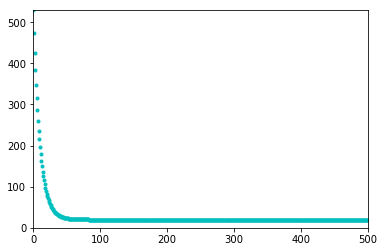

In [15]:
plt.plot(train_costs[0], train_costs[1], 'c.')
plt.axis([0, num_epochs, 0, max(train_costs[1])])
plt.show()   

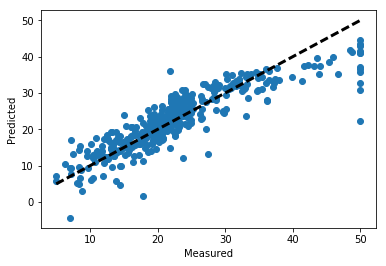

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_train, pred_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

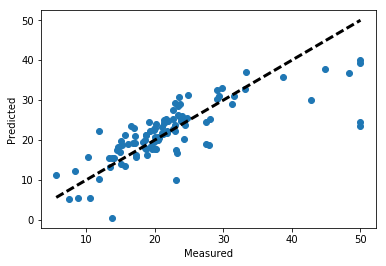

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()